In [1]:
from utils.dataset import TradingDataset

dataset = TradingDataset('data/', mode='validation')

Found 56461 samples for validation mode


In [ ]:
from models.model_wrapper import TradingModel

model = TradingModel.from_pretrained('pretrained-models/TradingLSTM')
# model = TradingModel.from_pretrained('pretrained-models/TradingTCN')
# model = TradingModel.from_pretrained('pretrained-models/TradingCNN')
# model = TradingModel.from_pretrained('pretrained-models/TradingTransformer')
# model = TradingModel.from_pretrained('pretrained-models/TradingLSTM_FFN')
# model = TradingModel.from_pretrained('pretrained-models/TradingBERT')

Модель TradingLSTM успешно загружена из pretrained-models/TradingLSTM


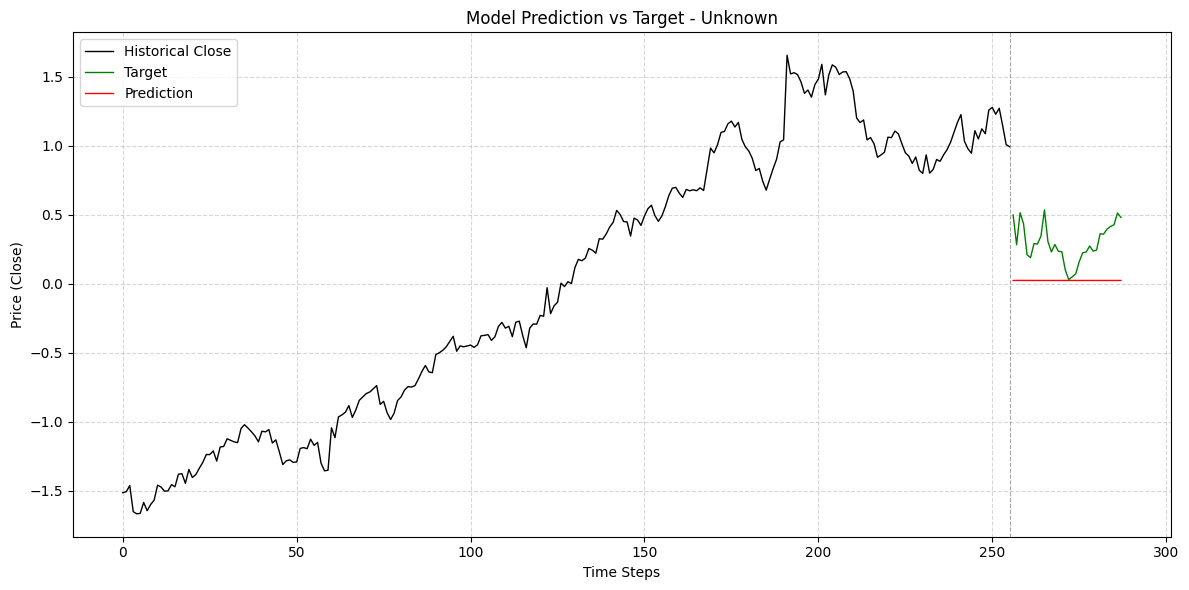

In [53]:
import torch
from utils.visualization import plot_model_prediction

sample = dataset[torch.randint(0, len(dataset), (1,)).item()]
model_pred = model(sample['history'])
plot_model_prediction(sample['history'], sample['target'], model_pred)